In [32]:
import csv
import pandas as pd
import numpy as np

# Dependencies and Setup
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

from scipy.stats import linregress
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [33]:
file= "../testing_data.csv"

df = pd.read_csv(file)

df.head(10)

,gender,hs_gpa,year_of_study,field,current_gpa,off_campus,monthly_allowance,scholarship,study_hours,partying_frequency,drinks_consumed,classes_missed,modules_failed,relationship,parents_approval,parent_relationship
0,Female,76.0,2,Arts & Social Sciences,72.0,Yes,R 4001- R 5000,No,4,-1,4,3,0,Yes,Yes,Very close
1,Male,89.0,2,Economic & Management Sciences,75.0,Yes,R 7001 - R 8000,Yes,4,-1,2,4,0,No,Yes,Very close
2,Male,76.0,1,AgriSciences,55.0,Yes,R 4001- R 5000,No,2,2,4,3,0,No,Yes,Very close
3,Male,89.0,2,Engineering,84.0,Yes,R 6001 - R 7000,No,2,3,4,2,0,Yes,Yes,Very close
4,Female,74.0,2,Arts & Social Sciences,52.0,Yes,R 4001- R 5000,No,2,-1,3,1,3,No,Yes,Fair
5,Male,80.0,2,Economic & Management Sciences,54.0,Yes,R 5001 - R 6000,No,4,2,3,1,0,No,Yes,Very close
6,Female,85.0,2,Arts & Social Sciences,75.0,Yes,R 5001 - R 6000,No,2,3,2,2,0,Yes,Yes,Very close
7,Female,80.0,2,Arts & Social Sciences,75.0,Yes,R 6001 - R 7000,No,4,3,4,0,0,No,Yes,Close
8,Male,79.0,2,Economic & Management Sciences,64.0,Yes,R 5001 - R 6000,No,2,2,2,2,4,No,Yes,Very close
9,Female,72.0,2,Economic & Management Sciences,76.0,Yes,R 6001 - R 7000,No,1,1,2,0,0,Yes,Yes,Very close


In [34]:
df.describe()

,hs_gpa,year_of_study,current_gpa,study_hours,partying_frequency,drinks_consumed,classes_missed,modules_failed
count,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000
mean,78.224161,1.838926,66.493289,2.489933,1.083893,2.412752,1.010067,0.885906
std,6.546669,0.837401,9.327853,1.269255,1.527418,1.189505,1.243122,1.281992
min,60.000000,1.000000,30.000000,0.000000,-1.000000,0.000000,0.000000,0.000000
25%,74.000000,1.000000,60.000000,1.000000,-1.000000,1.000000,0.000000,0.000000
50%,78.000000,2.000000,65.000000,3.000000,1.000000,3.000000,1.000000,0.000000
75%,83.000000,2.000000,73.875000,4.000000,2.000000,3.000000,2.000000,1.000000
max,99.000000,5.000000,95.200000,4.000000,4.000000,4.000000,4.000000,4.000000


In [35]:
corrs=df.corr(numeric_only=True)
corrs

,hs_gpa,year_of_study,current_gpa,study_hours,partying_frequency,drinks_consumed,classes_missed,modules_failed
hs_gpa,1.000000,0.165740,0.303749,0.256767,-0.084854,-0.114134,0.023718,-0.103977
year_of_study,0.165740,1.000000,-0.007036,0.204378,-0.047313,0.060209,-0.089001,0.089460
current_gpa,0.303749,-0.007036,1.000000,0.029656,0.031400,-0.089603,-0.115589,-0.437896
study_hours,0.256767,0.204378,0.029656,1.000000,-0.226208,-0.121010,-0.094896,-0.054508
partying_frequency,-0.084854,-0.047313,0.031400,-0.226208,1.000000,0.269975,0.299234,-0.151569
drinks_consumed,-0.114134,0.060209,-0.089603,-0.121010,0.269975,1.000000,0.359224,0.075145
classes_missed,0.023718,-0.089001,-0.115589,-0.094896,0.299234,0.359224,1.000000,0.047203
modules_failed,-0.103977,0.089460,-0.437896,-0.054508,-0.151569,0.075145,0.047203,1.000000


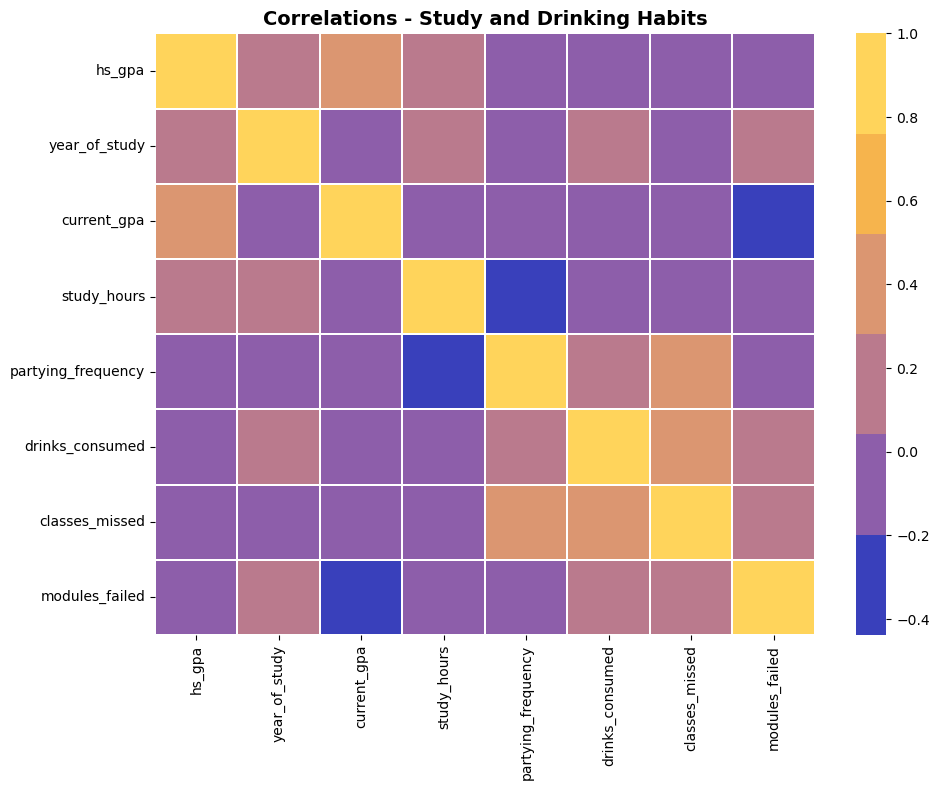

In [87]:
colors = ["#3940bb", "#8D5EAA", "#BA7A8D", "#db9671", "#F6B44D", "#ffd45b"]
# colors=['#F6B44D', '#db9671', '#BA7A8D', '#8D5EAA', '#3940BB', '#0033b0']

cmap = sns.color_palette(colors)

# Create the heatmap
plt.figure(figsize=(10,8))
ax=sns.heatmap(corrs, cmap=cmap, linewidth=0.25)
plt.title("Correlations - Study and Drinking Habits",fontweight = "bold", fontsize = 14)

plt.tight_layout()
plt.show()

In [120]:
#numeric only to create heatmap 

file= "../numeric_only.csv"

numeric = pd.read_csv(file)

numeric.head(10)

,gender,hs_gpa,year,field,gpa,campus,money,aid,study,freq,drinks,classes,mods,relation,approval,family
0,0,76.0,2,1,72.0,1,0,0,4,-1,4,3,0,1,1,3
1,1,89.0,2,2,75.0,1,3,1,4,-1,2,4,0,0,1,3
2,1,76.0,1,0,55.0,1,0,0,2,2,4,3,0,0,1,3
3,1,89.0,2,4,84.0,1,2,0,2,3,4,2,0,1,1,3
4,0,74.0,2,1,52.0,1,0,0,2,-1,3,1,3,0,1,2
5,1,80.0,2,2,54.0,1,1,0,4,2,3,1,0,0,1,3
6,0,85.0,2,1,75.0,1,1,0,2,3,2,2,0,1,1,3
7,0,80.0,2,1,75.0,1,2,0,4,3,4,0,0,0,1,0
8,1,79.0,2,2,64.0,1,1,0,2,2,2,2,4,0,1,3
9,0,72.0,2,2,76.0,1,2,0,1,1,2,0,0,1,1,3


In [121]:
all_corrs=numeric.corr(numeric_only=True)
all_corrs

,gender,hs_gpa,year,field,gpa,campus,money,aid,study,freq,drinks,classes,mods,relation,approval,family
gender,1.000000,-0.085158,0.061237,-0.030807,-0.136474,-0.148057,-0.069308,0.001393,-0.057859,0.130844,0.341977,0.164768,0.074322,-0.031190,-0.016346,-0.040264
hs_gpa,-0.085158,1.000000,0.165740,0.266756,0.303749,-0.204599,-0.026292,0.107737,0.256767,-0.084854,-0.114134,0.023718,-0.103977,0.029880,0.129298,0.025218
year,0.061237,0.165740,1.000000,-0.058057,-0.007036,0.037007,0.117577,0.007017,0.204378,-0.047313,0.060209,-0.089001,0.089460,0.053661,0.051747,-0.004808
field,-0.030807,0.266756,-0.058057,1.000000,0.063618,-0.082933,-0.000086,0.056602,0.086224,-0.113733,-0.162506,-0.063340,-0.051998,-0.067774,0.023774,-0.037642
gpa,-0.136474,0.303749,-0.007036,0.063618,1.000000,-0.036005,0.071479,0.038519,0.029656,0.031400,-0.089603,-0.115589,-0.437896,0.045906,0.103671,0.033537
campus,-0.148057,-0.204599,0.037007,-0.082933,-0.036005,1.000000,0.196174,-0.122887,0.041178,-0.046020,0.019468,-0.029744,0.045945,0.100579,0.047780,0.075942
money,-0.069308,-0.026292,0.117577,-0.000086,0.071479,0.196174,1.000000,-0.136694,0.054915,0.140109,0.090627,0.051038,0.001422,0.034661,0.049051,0.049174
aid,0.001393,0.107737,0.007017,0.056602,0.038519,-0.122887,-0.136694,1.000000,0.093324,-0.085599,-0.073191,-0.048949,0.037694,0.045844,-0.127660,-0.023411
study,-0.057859,0.256767,0.204378,0.086224,0.029656,0.041178,0.054915,0.093324,1.000000,-0.226208,-0.121010,-0.094896,-0.054508,-0.014506,0.053937,0.044705
freq,0.130844,-0.084854,-0.047313,-0.113733,0.031400,-0.046020,0.140109,-0.085599,-0.226208,1.000000,0.269975,0.299234,-0.151569,0.005609,0.108177,0.068772


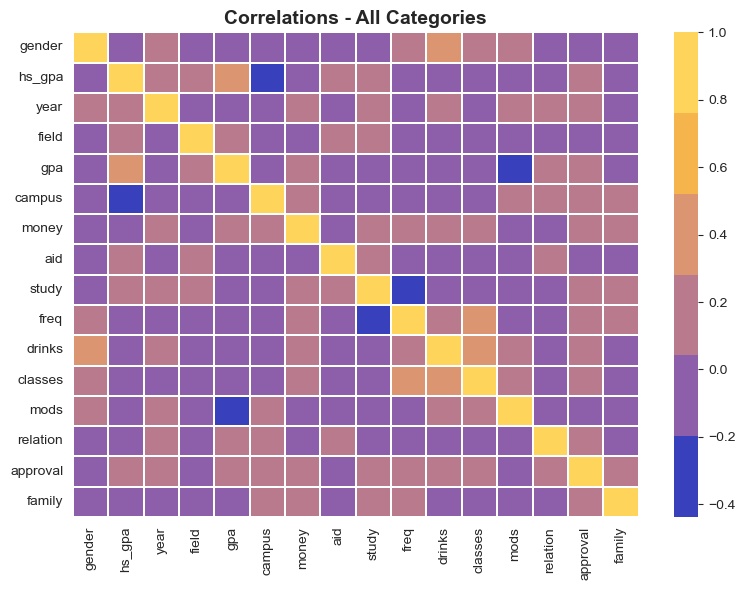

In [122]:
colors = ["#3940bb", "#8D5EAA", "#BA7A8D", "#db9671", "#F6B44D", "#ffd45b"]
# colors=['#F6B44D', '#db9671', '#BA7A8D', '#8D5EAA', '#3940BB', '#0033b0']

cmap = sns.color_palette(colors)

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(all_corrs, cmap=cmap, linewidth=0.25)
plt.title("Correlations - All Categories",fontweight = "bold", fontsize = 14)

plt.tight_layout()
plt.savefig("heatmap_all.png")
plt.show()

In [123]:
numeric.corr(numeric_only=True)["gpa"]


gender     -0.136474
hs_gpa      0.303749
year       -0.007036
field       0.063618
gpa         1.000000
campus     -0.036005
money       0.071479
aid         0.038519
study       0.029656
freq        0.031400
drinks     -0.089603
classes    -0.115589
mods       -0.437896
relation    0.045906
approval    0.103671
family      0.033537
Name: gpa, dtype: float64

In [124]:
#correlations

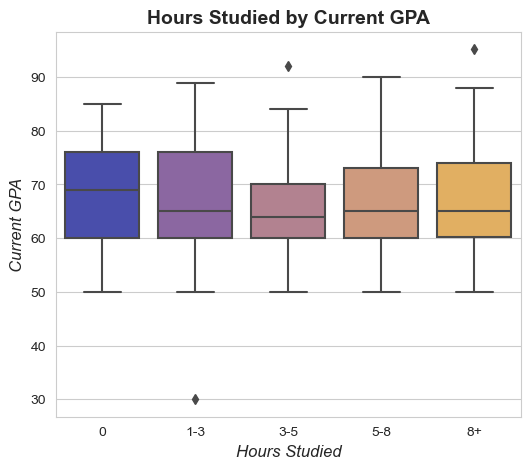

In [126]:
#canvas
plt.figure(figsize=(6,5))
sns.set_style("whitegrid") 

#used seaborn documentation
ax=sns.boxplot(data=df, x="study_hours", y="current_gpa",palette=["#3940bb","#8d5eaa","#ba7a8d","#db9671", "#f6b44d"])

plt.xlabel("Hours Studied", fontsize=12, fontstyle="italic")
plt.ylabel("Current GPA", fontsize=12, fontstyle="italic")
plt.title("Hours Studied by Current GPA",fontweight = "bold", fontsize = 14)

ax.set_xticklabels(['0', '1-3', '3-5', '5-8', '8+'])

plt.savefig("box_studyvsgpa.png")
plt.show()

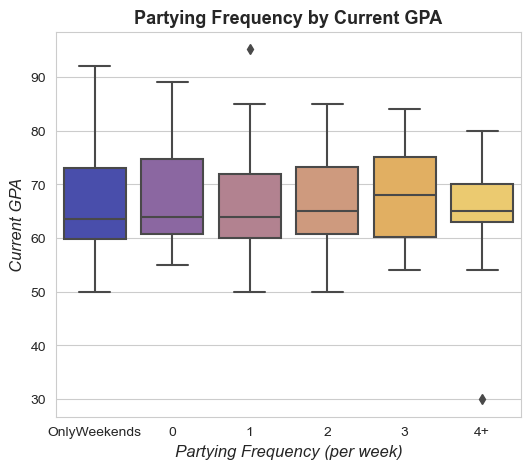

In [127]:
plt.figure(figsize=(6,5))
sns.set_style("whitegrid")

ax=sns.boxplot(data=df, x="partying_frequency", y="current_gpa", palette=["#3940bb","#8d5eaa","#ba7a8d","#db9671", "#f6b44d","#ffd45b"])

plt.xlabel("Partying Frequency (per week)", fontsize=12, fontstyle="italic")
plt.ylabel("Current GPA", fontsize=12, fontstyle="italic")
plt.title("Partying Frequency by Current GPA",fontweight = "bold", fontsize = 13)

ax.set_xticklabels(['OnlyWeekends', '0', '1', '2', '3', '4+'])

plt.savefig("box_freqvsgpa.png")
plt.show()

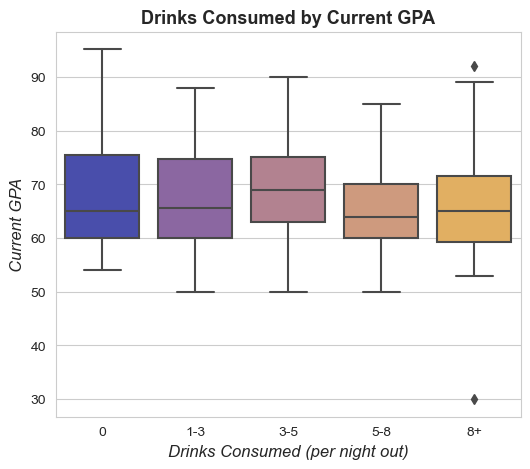

In [128]:
plt.figure(figsize=(6,5))
sns.set_style("whitegrid")

ax=sns.boxplot(data=df, x="drinks_consumed", y="current_gpa",palette=["#3940bb","#8d5eaa","#ba7a8d","#db9671", "#f6b44d"])

plt.xlabel("Drinks Consumed (per night out)", fontsize=12, fontstyle="italic")
plt.ylabel("Current GPA", fontsize=12, fontstyle="italic")
plt.title("Drinks Consumed by Current GPA",fontweight = "bold", fontsize = 13)

ax.set_xticklabels(['0', '1-3', '3-5', '5-8', '8+'])

plt.savefig("box_drinksvsgpa.png")
plt.show()

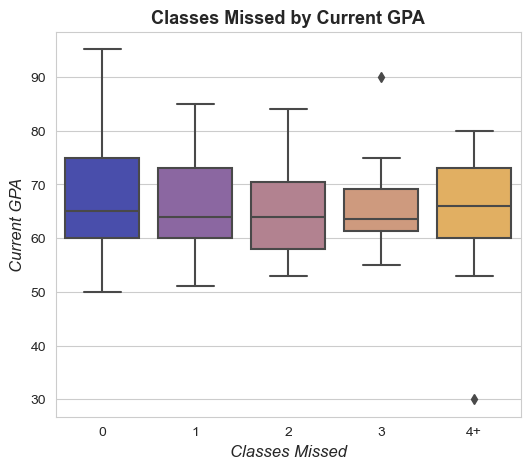

In [129]:
plt.figure(figsize=(6, 5))
sns.set_style("whitegrid")

ax=sns.boxplot(data=df, x="classes_missed", y="current_gpa",palette=["#3940bb","#8d5eaa","#ba7a8d","#db9671", "#f6b44d"])

plt.xlabel("Classes Missed", fontsize=12, fontstyle="italic")
plt.ylabel("Current GPA", fontsize=12, fontstyle="italic")
plt.title("Classes Missed by Current GPA",fontweight = "bold", fontsize = 13)

ax.set_xticklabels(['0', '1', '2', '3', '4+'])

plt.savefig("box_classesvsgpa.png")
plt.show()

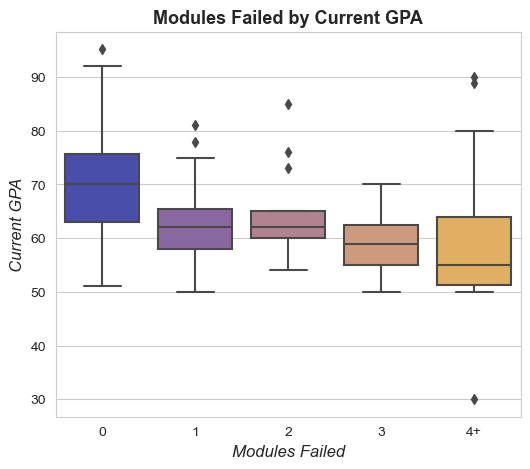

In [130]:
plt.figure(figsize=(6, 5))

sns.set_style("whitegrid")
ax=sns.boxplot(data=df, x="modules_failed", y="current_gpa",palette=["#3940bb","#8d5eaa","#ba7a8d","#db9671", "#f6b44d"])

plt.xlabel("Modules Failed", fontsize=12, fontstyle="italic")
plt.ylabel("Current GPA", fontsize=12, fontstyle="italic")
plt.title("Modules Failed by Current GPA",fontweight = "bold", fontsize = 13)

ax.set_xticklabels(['0', '1', '2', '3', '4+'])

plt.savefig("box_modsvsgpa.png")
plt.show()

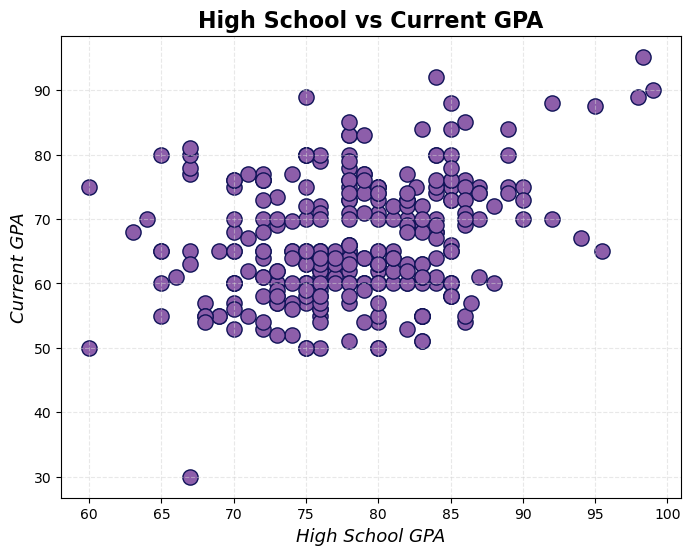

In [41]:
#return to using original data frame 

x_val = df.hs_gpa
y_val = df.current_gpa


#canvas
plt.figure(figsize=(8,6))

#plot
plt.scatter(x_val, y_val, facecolor="#8d5eaa", edgecolor="#101358", s=120)
#line of best fit

#customize
plt.xlabel("High School GPA", fontsize=13, fontstyle="italic")
plt.ylabel("Current GPA", fontsize=13, fontstyle="italic")
plt.title("High School vs Current GPA", fontweight="bold", fontsize=16)

plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)

plt.savefig("scatter_gpas.png")
plt.show()

The r-squared is: 0.09226347087739142


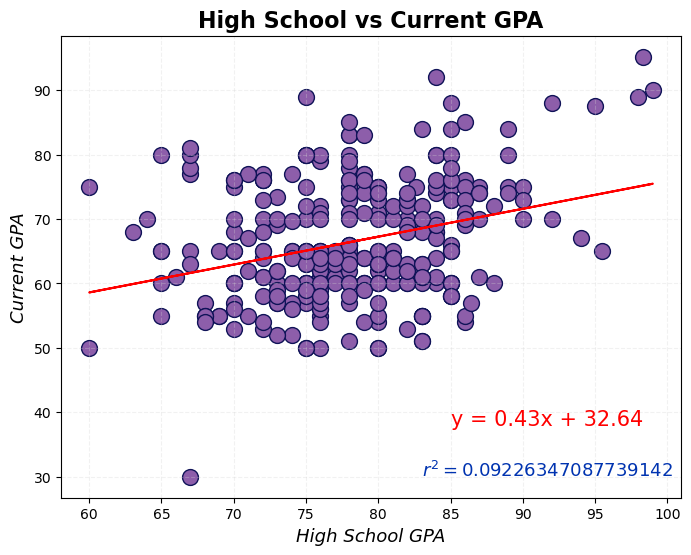

In [109]:
x_val = df.hs_gpa
y_val = df.current_gpa


#line of best fit
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_val = x_val * slope + intercept #prediction
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#canvas
plt.figure(figsize=(8,6))

#plot
plt.scatter(x_val, y_val, facecolor="#8d5eaa", edgecolor="#101358", s=130)

#line of best fit
plt.plot(x_val, regress_val, "r-") 

#customize
plt.xlabel("High School GPA", fontsize=13, fontstyle="italic")
plt.ylabel("Current GPA", fontsize=13, fontstyle="italic")
plt.title("High School vs Current GPA", fontweight="bold", fontsize=16)


plt.grid(color="lightgrey", linestyle = "--", alpha=0.3)

plt.annotate(line_eq,(85,38), fontsize=15, color="red")
plt.annotate(r"$r^2 = {}$".format(rvalue**2), (83,30), fontsize=13, color="#0033b0")

print(f"The r-squared is: {rvalue**2}")
plt.savefig("linear_hsvsgpa.png")
plt.show()


The r-squared is: 0.19175251665150675


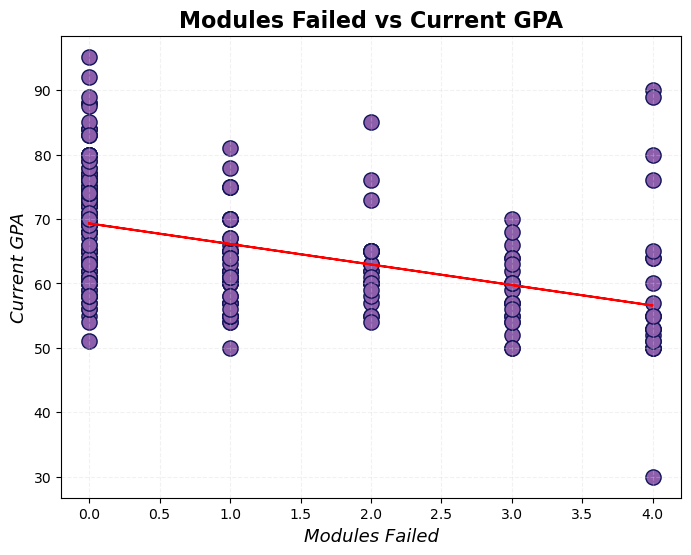

In [95]:
x_val = df.modules_failed
y_val = df.current_gpa


#line of best fit
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_val = x_val * slope + intercept #prediction
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#canvas
plt.figure(figsize=(8,6))

#plot
plt.scatter(x_val, y_val, facecolor="#8d5eaa", edgecolor="#101358", s=120)
#line of best fit
plt.plot(x_val, regress_val, "r-") 

#customize
plt.xlabel("Modules Failed", fontsize=13, fontstyle="italic")
plt.ylabel("Current GPA", fontsize=13, fontstyle="italic")
plt.title("Modules Failed vs Current GPA", fontweight="bold", fontsize=16)


plt.grid(color="lightgrey", linestyle = "--", alpha=0.3)

plt.annotate(line_eq,(85,30), fontsize=15, color="red")

print(f"The r-squared is: {rvalue**2}")
plt.savefig("regression_modvsgpa.png")
plt.show()


In [44]:
# The degree of freedom is 3-1 = 2
# With a p-value of 0.05, the confidence level is 1.00-0.05 = 0.95.
critical_value = stats.chi2.ppf(q = 0.95, df = 2)
critical_value

5.991464547107979

In [68]:
x=df.current_gpa

In [69]:
res = stats.normaltest(x)
res.statistic
print("Test Statistic:", res.statistic)
# Access the p-value
print("P-value:", res.pvalue)

#small deviation from normality

Test Statistic: 4.174399722338605
P-value: 0.12403396232388332


In [77]:
x=df.hs_gpa

In [78]:
res = stats.normaltest(x)
res.statistic
print("Test Statistic:", res.statistic)
# Access the p-value
print("P-value:", res.pvalue)

Test Statistic: 2.805887631854226
P-value: 0.24587209533493118


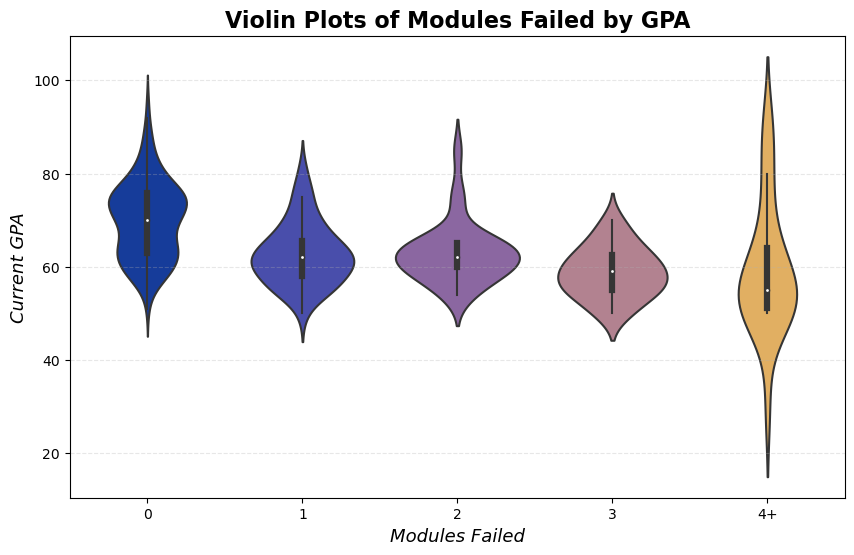

In [51]:
# distribution
plt.figure(figsize=(10, 6))
ax=sns.violinplot(data=df, x="modules_failed", y="current_gpa",palette=["#0033b0","#3940bb","#8d5eaa","#ba7a8d","#f6b44d"])
plt.xlabel("Modules Failed", fontsize=13, fontstyle="italic")
plt.ylabel("Current GPA", fontsize=13, fontstyle="italic")

ax.set_xticklabels(['0', '1', '2', '3', '4+'])

plt.title("Violin Plots of Modules Failed by GPA",fontweight = "bold", fontsize = 16)


plt.grid(axis='y', alpha = .3, linestyle = '--')

plt.savefig("violin_modsvsgpa.png")
plt.show()


## T TEST

In [49]:
df.groupby("modules_failed").current_gpa.describe()

,count,mean,std,min,25%,50%,75%,max
modules_failed,,,,,,,,
0,174.0,70.080460,8.306977,51.0,63.00,70.0,75.75,95.2
1,51.0,62.784314,6.676268,50.0,58.00,62.0,65.50,81.0
2,28.0,62.964286,6.472060,54.0,60.00,62.0,65.00,85.0
3,23.0,58.826087,5.407505,50.0,55.00,59.0,62.50,70.0
4,22.0,59.227273,13.969122,30.0,51.25,55.0,64.00,90.0


In [58]:
#null - difference between gpa of student with 0  versus 1 module failed
#alternative - no difference

df.groupby("modules_failed").current_gpa.var()

modules_failed
0     69.005859
1     44.572549
2     41.887566
3     29.241107
4    195.136364
Name: current_gpa, dtype: float64

In [59]:
#testing difference between 0 and 1 module failed

none = df.loc[df.modules_failed ==0, "current_gpa"]
one = df.loc[df.modules_failed ==1, "current_gpa"]

In [60]:
stats.ttest_ind(none, one, equal_var=False)

TtestResult(statistic=6.472863540439957, pvalue=3.6357283563982835e-09, df=99.73736812175724)

In [61]:
two = df.loc[df.modules_failed ==2, "current_gpa"]
three = df.loc[df.modules_failed ==3, "current_gpa"]
four_up = df.loc[df.modules_failed ==4, "current_gpa"]

In [62]:
stats.ttest_ind(two, four_up, equal_var= False)

TtestResult(statistic=1.16070750349825, pvalue=0.2555407870220954, df=28.060253534007103)

## ANOVA

In [63]:
group0 = df[df["modules_failed"] == 0]["current_gpa"]
group1 = df[df["modules_failed"] == 1]["current_gpa"]
group2 = df[df["modules_failed"] == 2]["current_gpa"]
group3 = df[df["modules_failed"] == 3]["current_gpa"]
group4 = df[df["modules_failed"] == 4]["current_gpa"]

In [64]:
#testing for pvalue <0.05 = significant difference
stats.f_oneway(group0, group1, group2, group3, group4)

F_onewayResult(statistic=21.21182757505435, pvalue=2.2357721628822536e-15)

In [65]:
stats.ttest_ind(group0, group1, equal_var=False)

TtestResult(statistic=6.472863540439957, pvalue=3.6357283563982835e-09, df=99.73736812175724)

In [66]:
print(stats.ttest_ind(group0, group1, equal_var = False))
print(stats.ttest_ind(group0, group2, equal_var = False))
print(stats.ttest_ind(group0, group3, equal_var = False))
print(stats.ttest_ind(group0, group4, equal_var = False))

TtestResult(statistic=6.472863540439957, pvalue=3.6357283563982835e-09, df=99.73736812175724)
TtestResult(statistic=5.172739379476483, pvalue=5.8193009599987765e-06, df=42.744074608838304)
TtestResult(statistic=8.71427706694881, pvalue=1.5480717369552362e-10, df=37.403254731486896)
TtestResult(statistic=3.5653428178266786, pvalue=0.0016507392004433206, df=22.91431268080388)
